### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading dataset

In [2]:
df = pd.read_csv("./data/personality_dataset.csv")

In [3]:
df.shape

(2900, 8)

In [4]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [6]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


<Axes: >

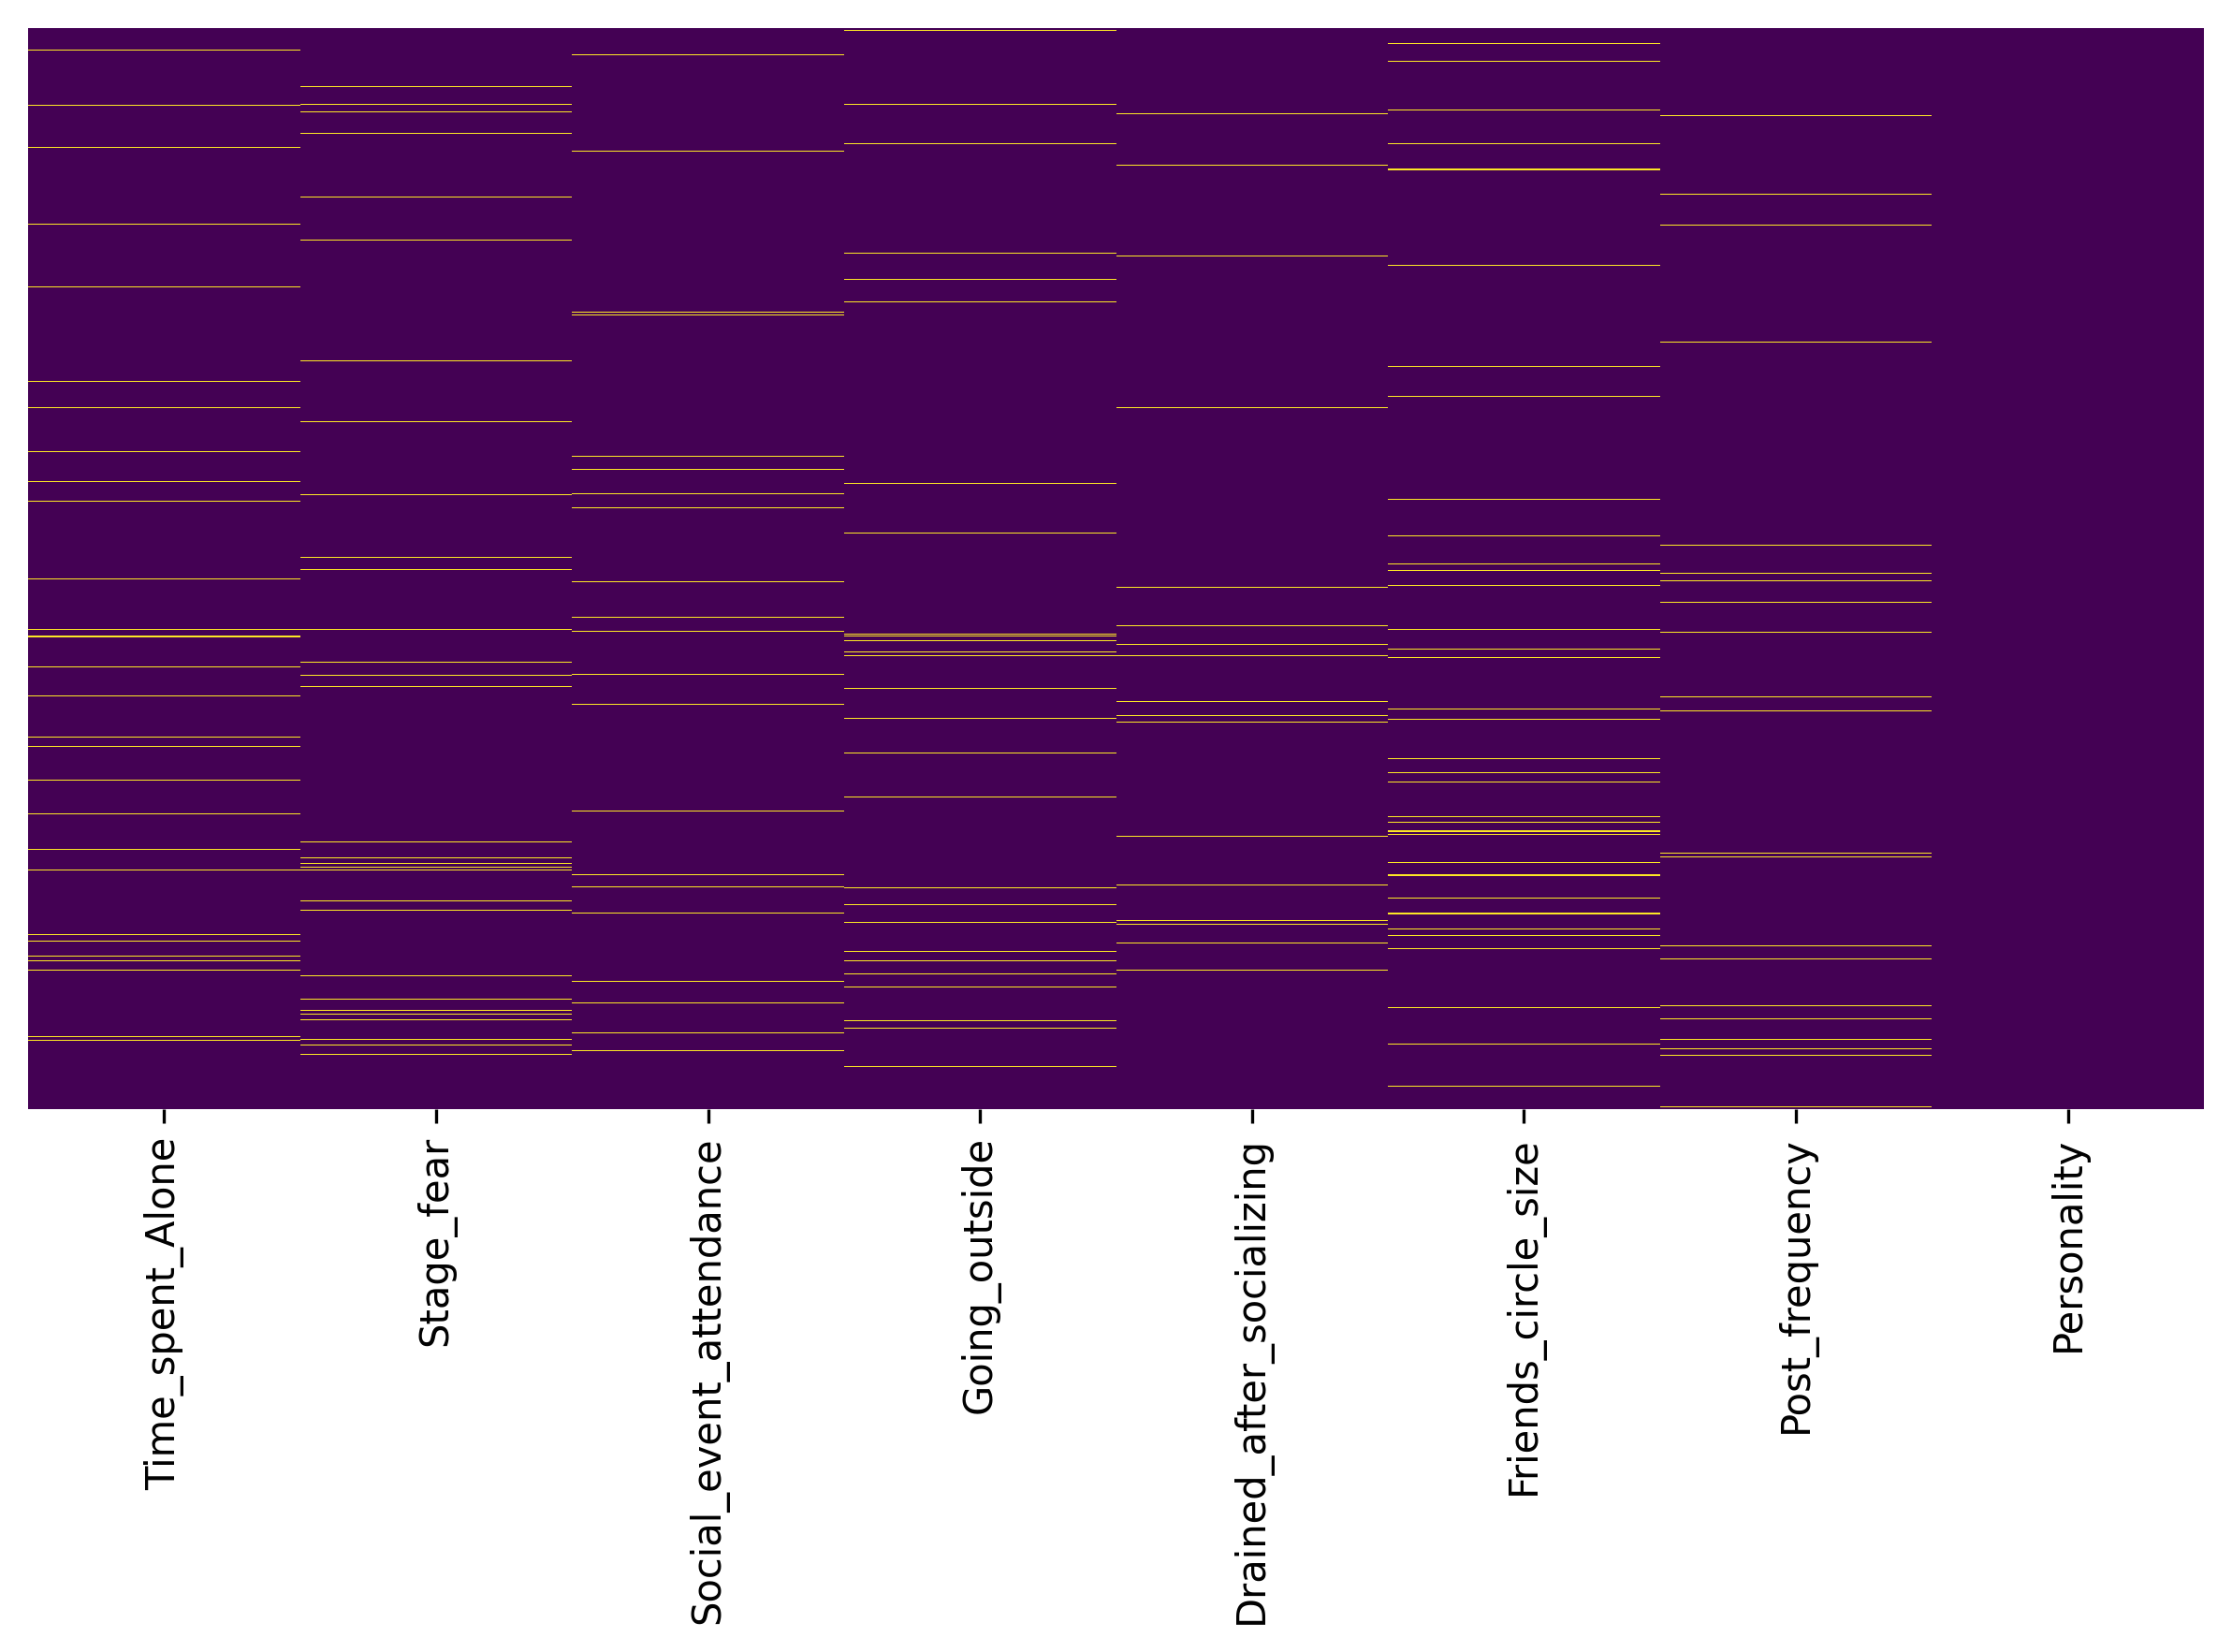

In [7]:
plt.figure(figsize=(10, 5), dpi=300)

sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)

In [8]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

### **1. Data Preprocessing**

**a. Handling missing values using KNN**

In [9]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [10]:
df["Drained_after_socializing"] = df.Drained_after_socializing.map({"Yes" : 1, "No" : 0})

In [11]:
df["Stage_fear"] = df.Stage_fear.map({"Yes":1, "No":0})

In [12]:
df["Personality"] = df.Personality.map({"Extrovert":0, "Introvert":1})

In [13]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,0
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,1
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,1
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,0
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,0


In [14]:
df_features = df[[col for col in df.columns if not col == "Personality"]]
df_target = pd.DataFrame(df.Personality)

In [15]:
# Apply KNNimputer from scikit learn

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

df_features_imputed = pd.DataFrame(imputer.fit_transform(df_features), columns=df_features.columns)

In [16]:
df_features_imputed

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0
...,...,...,...,...,...,...,...
2895,3.0,0.0,7.0,6.0,0.0,6.0,6.0
2896,3.0,0.0,8.0,3.0,0.0,14.0,9.0
2897,4.0,1.0,1.0,1.0,1.0,4.0,0.0
2898,11.0,1.0,1.0,1.4,1.0,2.0,0.0


In [17]:
df_features_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   float64
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   float64
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
dtypes: float64(7)
memory usage: 158.7 KB


**b. Split data into training and testing datasets**

In [18]:
from sklearn.model_selection import train_test_split

X = df_features_imputed
y = df_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**c. Scaling Data**

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **2. Model Training**

In [20]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train on the scaled training set
model.fit(X_train_scaled, y_train.values.ravel())

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### **3. Evalute on Testing data**

In [21]:
y_pred = model.predict(X_test_scaled)

### **4. Evaluate the Model**

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [23]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
report = classification_report(y_true=y_test, y_pred=y_pred)

In [24]:
print("Accuracy Score: ", accuracy)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Accuracy Score:  0.9293103448275862
Confusion Matrix:
 [[278  24]
 [ 17 261]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       302
           1       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



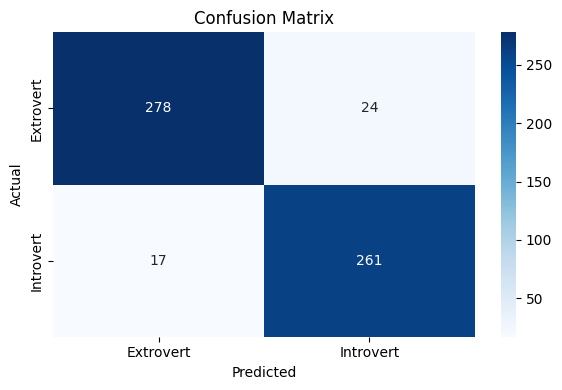

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Extrovert", "Introvert"], yticklabels=["Extrovert", "Introvert"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
